# Unsupervised Learning Predict (Team_JM1_#Awesome) Solution

© Explore Data Science Academy

---
### Honour Code

We { **MICHAEL OKEREAFOR, AYOOLA SOLANKE, RAHEEMAT ADETUNJI** }, confirm - by submitting this document - that the solutions in this notebook are a result of our own work and that we abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

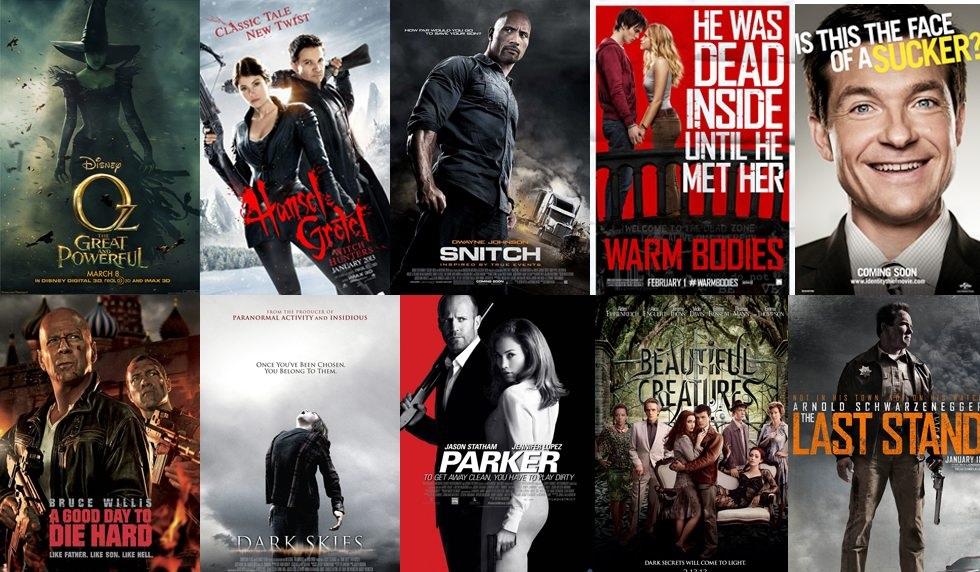

## Predict Overview: Movie Recommendation System 2022

In today’s technology driven world, recommender systems are socially and economically critical to ensure that individuals can make optimised choices surrounding the content they engage with on a daily basis. One application where this is especially true is movie recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

EDSA is challenging us during this Unsupervised Learning Sprint with the following tasks; 

- construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed, based on their historical preferences.

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being personalised recommendations - generating platform affinity for the streaming services which best facilitates their audience's viewing.


Recommender Systems are a type of information filtering system as they improve the quality of search results and provides items that are more relevant to the search item or are related to the search history of the user.  

Almost every major tech company has applied recommender systems in some form: Amazon uses it to suggest products to customers, YouTube uses it to decide which video to play next on autoplay and Facebook uses it to recommend pages to like and people to follow. Furthermore, companies like Netflix and Spotify depend on the effectiveness of their recommendation engines for the success of their business.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>     

<a href=#eight>8. Conclusion</a>

## Problem statement
Thousands of movies are produced and released every year by different countries.      
Many viewers find it tedious to inspect or select great movies that suits their preference from these numerous released movies; therefore, majority of these movies are left unexplored. 

Following consultation, we(*Awesome DataScientists*) agreed to construct an algorithm that will accurately rate and recommend unseen movies for movie lovers based on their historical choices.

In [1]:
import os
os.environ["COMET_URL_OVERRIDE"] = "https://www.comet.com/clientlib/"

from comet_ml import Experiment

In [2]:
experiment = Experiment(
    api_key="ROjbHRdIYvME1efnooXTYhCeg",
    project_name="unsupervised-learning-predict-project",
    workspace="chuqudee",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.com/chuqudee/unsupervised-learning-predict-project/a867d434fcfd473ba8a9df8516686189



 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>


### 1.1 Packages to be Imported and their uses
The following Packages/Libraries will be imported and used in this project work:

- Numpy: For arrays, algebra and Mathematical Calculations.
- Pandas: For Dataframe Manipulation and Statistical calculations such as mean.
- Matplotlib: For ploting normal charts and graphs.
- Seaborn: For scatterplots.
- Plotly: For producing interactive publication-quality graphs.
- Sklearn:  For text conversion and similarity computation.
- Suprise: For Unsupervised Model Building
- Garbage Collector (GC): To help free up memory space
- Pickle: To export or save our model for later predictions.

In [3]:
# Data manipulation
import numpy as np 
import pandas as pd   
import re

# Data visualization
import matplotlib
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

# Style
import matplotlib.style as style 
sns.set(font_scale=1.5)
style.use('seaborn-pastel')
sns.set(style="whitegrid")
sns.set_style("dark")

# Libraries used during sorting procedures.
import operator # <-- Convienient item retrieval during iteration 
import heapq # <-- Efficient sorting of large lists

# Building recommender systems
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
import gensim
from gensim.matutils import softcossim
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.stats import pearsonr
from sklearn.cluster import KMeans

# ML Pre processing
from surprise.model_selection import train_test_split

# For Unsupervised Model Building
import surprise
from surprise import Reader, Dataset, SVD
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise import accuracy
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise import dump
import pickle
import os

# Import time to measure algorithm runtime 
from time import time
from datetime import datetime

# Turn off or ignore minor warnings that may pop-up while executing codes.
import warnings 
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

# Garbage Collector
import gc

COMET INFO: Couldn't find a Git repository in 'C:\\Users\\PANDORA' nor in any parent directory. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>



### Movies Dataset from MovieLens Database and IMDB

We have been supplied with about 7 csv files. They generally consists of informations of movies and several million 5-star ratings obtained from users of the online MovieLens movie recommendation service.

- genome_scores.csv - a score mapping the strength between movies and tag-related properties. Read more here
- genome_tags.csv - user assigned tags for genome-related scores
- imdb_data.csv - Additional movie metadata scraped from IMDB using the links.csv file.
- links.csv - File providing a mapping between a MovieLens ID and associated IMDB and TMDB IDs.
- tags.csv - User assigned for the movies within the dataset.
- test.csv - The test split of the dataset. Contains user and movie IDs with no rating data.
- train.csv - The training split of the dataset. Contains user and movie IDs with associated rating data.

So lets get started with our project!

In [4]:
# Loading our datasets
movies_df = pd.read_csv('ul_predict_csvs/movies.csv')
movies_df.tail()

,movieId,title,genres
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)
62422,209171,Women of Devil's Island (1962),Action|Adventure|Drama


In [5]:
imdb_df = pd.read_csv('ul_predict_csvs/imdb_data.csv')
imdb_df.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [6]:
tags_df = pd.read_csv('ul_predict_csvs/tags.csv')
tags_df.tail()

,userId,movieId,tag,timestamp
1093355,162521,66934,Neil Patrick Harris,1427311611
1093356,162521,103341,cornetto trilogy,1427311259
1093357,162534,189169,comedy,1527518175
1093358,162534,189169,disabled,1527518181
1093359,162534,189169,robbery,1527518193


In [7]:
genomescores_df = pd.read_csv('ul_predict_csvs/genome_scores.csv')
genomescores_df.tail()

,movieId,tagId,relevance
15584443,206499,1124,0.11000
15584444,206499,1125,0.04850
15584445,206499,1126,0.01325
15584446,206499,1127,0.14025
15584447,206499,1128,0.03350


In [8]:
genometags_df = pd.read_csv('ul_predict_csvs/genome_tags.csv')
genometags_df.tail()

,tagId,tag
1123,1124,writing
1124,1125,wuxia
1125,1126,wwii
1126,1127,zombie
1127,1128,zombies


In [9]:
train_df = pd.read_csv('ul_predict_csvs/train.csv')
train_df.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [10]:
train_df.info()
#checking the shape
k, l = train_df.shape
print(f'train_df contains {k} rows and {l} columns')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB
train_df contains 10000038 rows and 4 columns


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


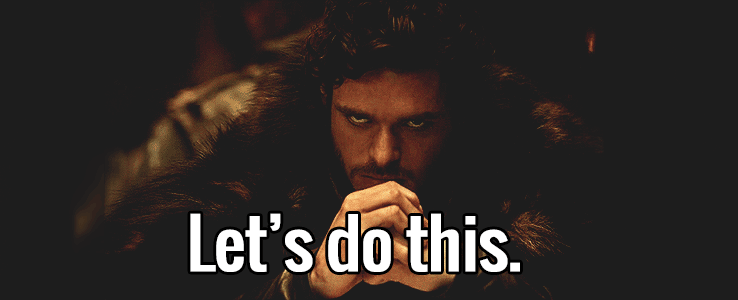

In this section, we will perform some indepth analysis on our datasets with the use of visualizations.

We will also look at ratings distribution of the data which will be illustrated using graphs.

First, Let us confirm the sizes of the datasets we are dealing with.

In [11]:
# Check the shape/sizes of the data sets
"""" 
Creating a DataFrame which tells the shape of each of our datasets
"""

# List Names of Data sets
Df_names = ['Movies Data', 'IMDB Data', 'Tags Data', 'Genome_Scores Data', 'Genome_Tags Data', 'Train Data', ]
# Generate a list of each data size
observations = [movies_df.shape[0], imdb_df.shape[0], tags_df.shape[0], 
                genomescores_df.shape[0], genometags_df.shape[0], train_df.shape[0]]
columns = [movies_df.shape[1], imdb_df.shape[1], tags_df.shape[1], 
           genomescores_df.shape[1], genometags_df.shape[1], train_df.shape[1]]

# Place & view result in Pandas DataFrame
size_df = pd.DataFrame(list(zip(Df_names, observations, columns)), columns=['Dataframe', 'Observations', 'Features'])
size_df

,Dataframe,Observations,Features
0,Movies Data,62423,3
1,IMDB Data,27278,6
2,Tags Data,1093360,4
3,Genome_Scores Data,15584448,3
4,Genome_Tags Data,1128,2
5,Train Data,10000038,4


**What do we observe here?**    
Each of these datasetas have different number of observations. But these datasets can however be related to one another with the `movieId` feature which is found on all the datasets.     

There are 10 million+ observations for training & validation (which could be a problem for systems with low computing power) which is a BIG DATA and this is a whole lot of Dataset to manipulate through.

Genome_Scores Data, which is a score mapping the strength between movies and tag-related properties being over 15 Million in size.

`timestamp` column can be found in `tags_df` and `train_df` which isn't particularly useful for our recommendation algorithm building and the time a movie was being rated nothing to do with a user's preferences or the quality of a film. BUT, the timestamps could, however, provide some meaningful insights in our EDA.

We may have to reduce the dimesionality of the dataset along the way.

**Calculating our total number of users:** since the `train_df` has the highest number of observations, lets us use it to calculate our total number of users.

In [12]:
unique_users = len(train_df['userId'].unique().tolist())
print(f'The total number of users are {unique_users}')

The total number of users are 162541


In [13]:
unique_users = len(train_df['movieId'].unique().tolist())
print(f'The total number of movies are {unique_users}')

The total number of movies are 48213


Checking the lowest and highest ratings received.

In [14]:
# minimum and maximum ratings
min_rating = train_df.rating.min()
max_rating = train_df.rating.max()
print('Lowest rating: {}'.format(min_rating))
print('Highest rating: {}'.format(max_rating))

Lowest rating: 0.5
Highest rating: 5.0


Lets take a look at the distribution of these ratings.

In [15]:
# Creating a class distribution in a dataframe
ratings_dist = pd.DataFrame(list(train_df['rating'].value_counts()),
                          index=train_df['rating'].unique(),
                          columns=['Rating count'])

ratings_dist

,Rating count
4.0,2652977
4.5,1959759
5.0,1445230
2.0,1270642
3.0,880516
1.0,656821
3.5,505578
2.5,311213
0.5,159731
1.5,157571


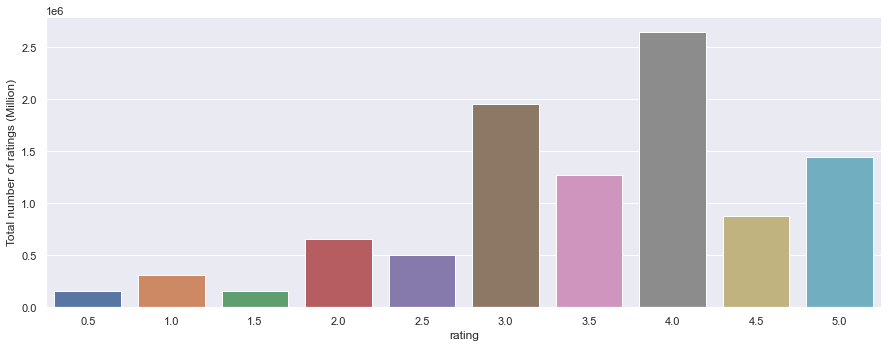

In [16]:
# Let's Visualise the Distribution of Rating in our Actual Train Data
with sns.axes_style('darkgrid'):
    g = sns.catplot("rating", data=train_df, aspect=2.5, kind='count')
    g.set_ylabels("Total number of ratings (Million)");

In [17]:
print (f'Total Number of ratings in train_df: {train_df.shape[0]}')
print (f'Average rating in train_df: {np.mean(train_df["rating"])}')

Total Number of ratings in train_df: 10000038
Average rating in train_df: 3.5333951730983424


For easy analysis of our data, we will merge the train dataframe with the movies dataframe based on the `movieId`.

In [18]:
# adding movie titles and genres to train_df
train_df = train_df.merge(movies_df[['movieId', 'title', 'genres']], on='movieId', how='left')

In [19]:
train_df.head()

,userId,movieId,rating,timestamp,title,genres
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,106343,5,4.5,1206238739,Father of the Bride Part II (1995),Comedy
2,146790,5459,5.0,1076215539,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...,Action|Comedy|Sci-Fi
3,106362,32296,2.0,1423042565,Miss Congeniality 2: Armed and Fabulous (2005),Adventure|Comedy|Crime
4,9041,366,3.0,833375837,Wes Craven's New Nightmare (Nightmare on Elm S...,Drama|Horror|Mystery|Thriller


Lets clean up the `train_df` features.

In [20]:
# Convert data types to strings for string handling
train_df['title'] = train_df.title.astype(str)
train_df['genres'] = train_df.genres.astype(str)

# Discarding the pipes between the genres 
train_df['genres'] = train_df['genres'].map(lambda x: x.lower().split('|'))
train_df['genres'] = train_df['genres'].apply(lambda x: " ".join(x))

# Extracting the release year from the titles
def get_release_dates(title):
    sub = title[-5:-1]
    year = int(sub) if sub.isdigit() else 9999    
    return year

# Creating the release year by extracting the release year from the movie title
train_df['release_year'] = train_df['title'].apply(get_release_dates)

# removing the year from the titles
#movies_df['title'] = movies_df['title'].map(lambda x: str(x)[:-6])

In [21]:
train_df.head()

,userId,movieId,rating,timestamp,title,genres,release_year
0,5163,57669,4.0,1518349992,In Bruges (2008),comedy crime drama thriller,2008
1,106343,5,4.5,1206238739,Father of the Bride Part II (1995),comedy,1995
2,146790,5459,5.0,1076215539,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...,action comedy sci-fi,2002
3,106362,32296,2.0,1423042565,Miss Congeniality 2: Armed and Fabulous (2005),adventure comedy crime,2005
4,9041,366,3.0,833375837,Wes Craven's New Nightmare (Nightmare on Elm S...,drama horror mystery thriller,1994


In [22]:
train_df.isnull().sum()

userId          0
movieId         0
rating          0
timestamp       0
title           0
genres          0
release_year    0
dtype: int64

**Users and Ratings**      
Let us observe our top movie raters. 

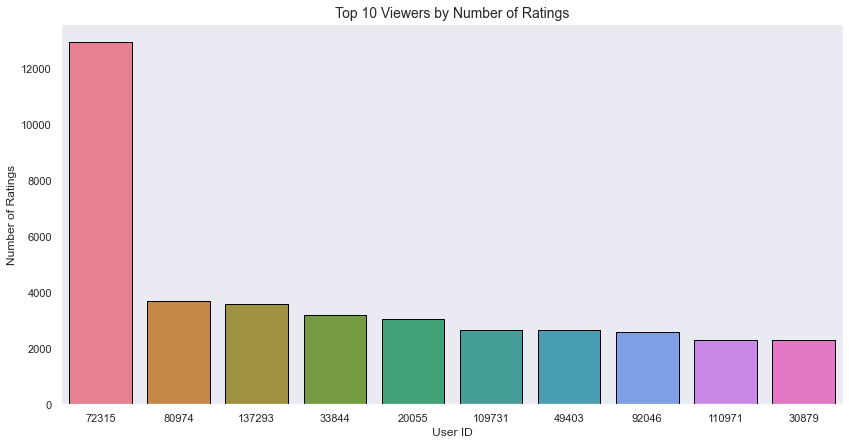

In [23]:
# Define Function that Reveals Users with Top Counts of Ratings
def user_ratings_count(df, n):
    plt.figure(figsize=(14,7))
    data = df['userId'].value_counts().head(n)
    ax = sns.barplot(x = data.index, y = data, order= data.index, palette="husl", edgecolor="black")
   
    plt.title(f'Top {n} Viewers by Number of Ratings', fontsize=14)
    plt.xlabel('User ID')
    plt.ylabel('Number of Ratings')
    plt.show()

user_ratings_count(train_df,10)

Our top movie rater(user 72315) has rated over 12,000 movies. It could be that this user rates any movie he/she watches. Or possibly a group of viewers sharing one userID.

Now let us visualise our most rated movies.

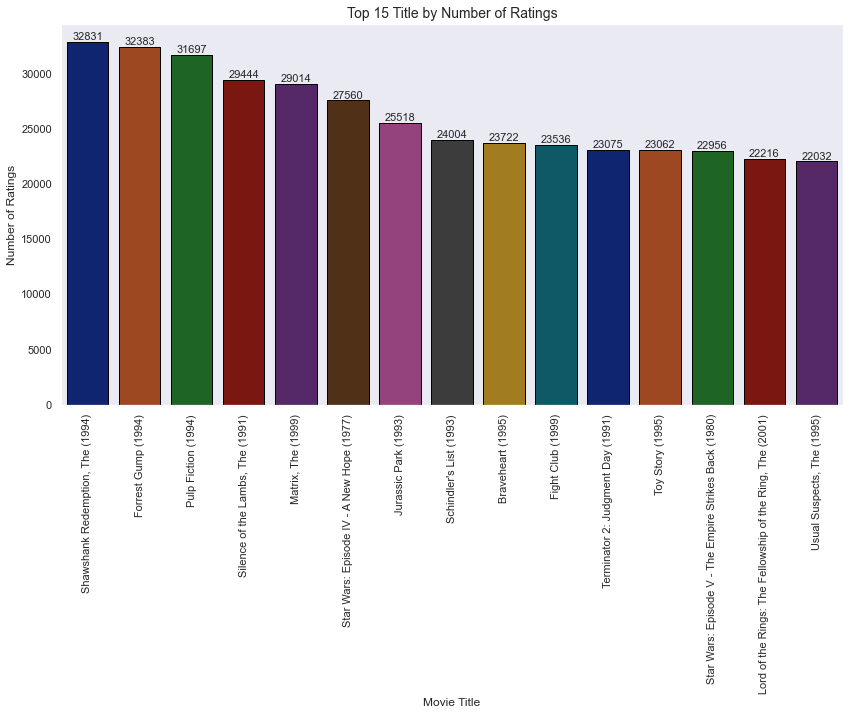

In [24]:
def top_rating_plot(df,column, n):
    plt.figure(figsize=(14,7))
    data = df[str(column)].value_counts().head(n)
    ax = sns.barplot(x = data.index, y = data, order= data.index, palette='dark', edgecolor="black")
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=11, ha='center', va='bottom')
    plt.title(f'Top {n} {column.title()} by Number of Ratings', fontsize=14)
    plt.xlabel('Movie Title')
    plt.ylabel('Number of Ratings')
    plt.xticks(rotation=90)
    plt.show()

# Call Function to get the top 10
top_rating_plot(train_df,'title',15)

To be honest, it is a big suprise not to see the Titanic movie among the top 15 rated movies. But there are other popular movies like Star Wars, Lord of the Rings, Terminator. 

Let us take a look at the most popular movie genre

In [25]:
mov_cop = movies_df.copy()
dict_count = {}

# Extracting the unique genres
all_genres = set(','.join([genres.replace('|',',').lower() for genres in mov_cop.genres]).split(','))
    
# Calculating the frequency of each genre 
for genre in all_genres:
    dict_count[genre] = ','.join([genres.replace('|',',').lower() for genres in mov_cop.genres]).count(genre)

# Sort the genres according to their frequency
sorted_dict = sorted(dict_count.items(), key=lambda x: x[1],reverse=True)
genre, frequency = zip(*sorted_dict)
genre_list = list(genre)
frequency_list = list(frequency)

In [26]:
mov_gen_count = pd.DataFrame(list(zip(genre, frequency)), 
                             columns =['Genre', 'Count'])
mov_gen_count

,Genre,Count
0,drama,25606
1,comedy,16870
2,thriller,8654
3,romance,7719
4,action,7348
5,horror,5989
6,documentary,5605
7,crime,5319
8,(no genres listed),5062
9,adventure,4145


There are 19 different movie genres in our movies dataset.
`Drama` appears to be the most popular genre in our movies dataset, followed by `Comedy`. We can assume that this kind of movies are popular because the budget for producing these movies are not high. And beside, we humans need Comedy movies to relieve stress, enhances our mental health makes us forget about our worries :)

Let us visualize this in a pie chart.

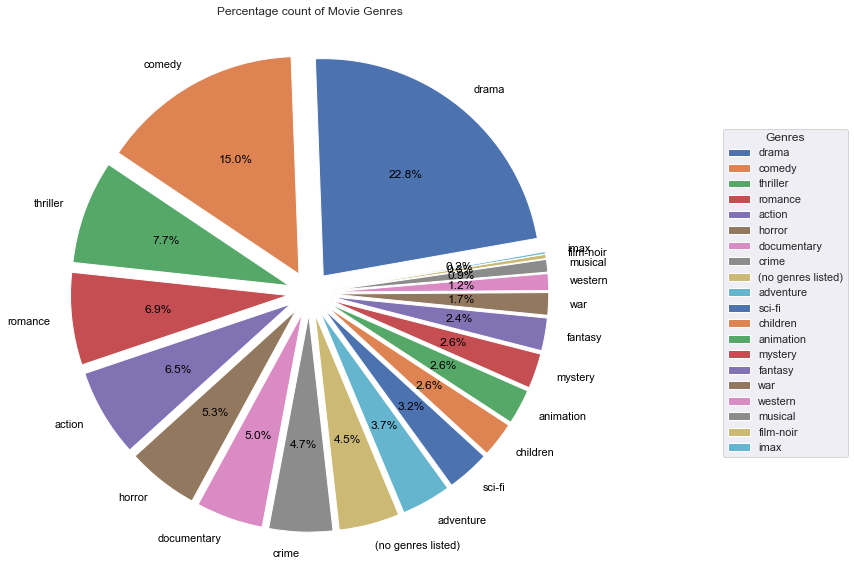

In [27]:
# Plotting the pie chart for above dataframe

explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 
           0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 
           0.1, 0.1, 0.1, 0.1, 0.1, 0.1)

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(15, 10))
wedges, texts, autotexts = ax.pie(frequency_list,
                                  autopct = lambda pct: func(pct, frequency_list),
                                  explode = explode,
                                  labels = genre_list,
                                  startangle = 10,
                                  textprops = dict(color ="black"))
# Adding legend
ax.legend(wedges, genre_list,
          title ="Genres",
          loc ="right",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 12, weight ="light")
ax.set_title("Percentage count of Movie Genres")
# show plot
plt.show()

**Movie Directors, Actors and Actresses**     
Next, we will visualise our popular movie actors and directors in wordcloud.

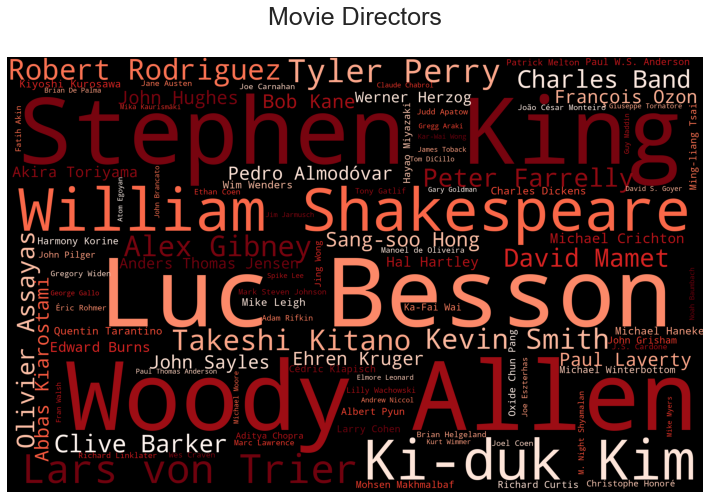

In [28]:
def wordcloud_generator(df, column):  
    keyword_counts = {}
    keyword_pair = []
    words = dict()
    
    # list of words that should be ignored
    ignore = ['nan', ' nan', 'nan ', 'See full summary' ]
    
    # Extract the unique keywords 
    for keyword in [keyword for keyword in df[column] if keyword not in ignore]:
        if keyword in keyword_counts.keys():
            keyword_counts[keyword] += 1
        else:
            keyword_counts[keyword] = 1
     
    # Pair the keywords with their frequencies
    for word,word_freq in keyword_counts.items():
        keyword_pair.append((word,word_freq))
       
    # Sort the keywords accprding to their frequencies
    keyword_pair.sort(key = lambda x: x[1],reverse=True)
    
    # Make it wordcloud-ready
    for s in keyword_pair:
        words[s[0]] = s[1]
        
    # Create a wordcloud using the top 2000 keywords
    wordcloud = WordCloud(width=800, 
                          height=500, 
                          background_color='black', 
                          max_words=100,
                          max_font_size=110,
                          scale=3,
                          random_state=0,
                          colormap='Reds').generate_from_frequencies(words)

    return wordcloud 
# converting 'director' column to string
imdb_df['director'] = imdb_df.director.astype(str)

# Plot wordcloud
directors = wordcloud_generator(imdb_df, 'director')
f = plt.figure(figsize=(20, 8)) 
plt.imshow(directors) 
plt.axis('off') 
plt.title('Movie Directors\n', fontsize=25)
plt.show()

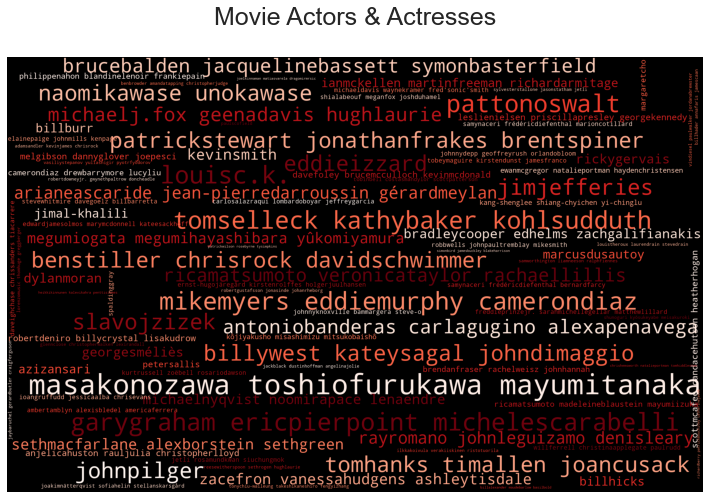

In [29]:
# preparing the title_cast column in imdb_df for word cloud
imdb_df['title_cast'] = imdb_df.title_cast.astype(str)
imdb_df['title_cast'] = imdb_df['title_cast'].apply(lambda x: "".join(x.lower() for x in x.split()))
imdb_df['title_cast'] = imdb_df['title_cast'].map(lambda x: x.split('|')[:3])
imdb_df['title_cast'] = imdb_df['title_cast'].apply(lambda x: " ".join(x))

# Plot wordcloud
actors = wordcloud_generator(imdb_df, 'title_cast')
f = plt.figure(figsize=(20, 8)) 
plt.imshow(actors) 
plt.axis('off') 
plt.title('Movie Actors & Actresses\n', fontsize=25)
plt.show()

**Making use of timestamp for analysis**     
Let us break down the `timestamp` into data and time for further analysis.

In [30]:
#From movie data, convert timestamp to datetime
train_df['date_time'] = train_df['timestamp'].apply(lambda x: datetime.fromtimestamp(x))

# Extracting year, month, day-of-week
train_df['Year'] = train_df['date_time'].dt.year
train_df['Month'] = train_df['date_time'].dt.month
train_df['Day of Week'] = train_df['date_time'].dt.dayofweek

In [31]:
train_df.head()

,userId,movieId,rating,timestamp,title,genres,release_year,date_time,Year,Month,Day of Week
0,5163,57669,4.0,1518349992,In Bruges (2008),comedy crime drama thriller,2008,2018-02-11 12:53:12,2018,2,6
1,106343,5,4.5,1206238739,Father of the Bride Part II (1995),comedy,1995,2008-03-23 03:18:59,2008,3,6
2,146790,5459,5.0,1076215539,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...,action comedy sci-fi,2002,2004-02-08 05:45:39,2004,2,6
3,106362,32296,2.0,1423042565,Miss Congeniality 2: Armed and Fabulous (2005),adventure comedy crime,2005,2015-02-04 10:36:05,2015,2,2
4,9041,366,3.0,833375837,Wes Craven's New Nightmare (Nightmare on Elm S...,drama horror mystery thriller,1994,1996-05-29 14:17:17,1996,5,2


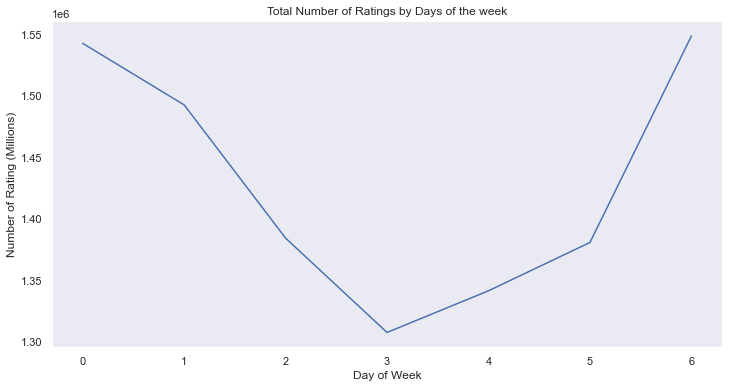

In [32]:
# Ratings by Day-of-Week
dow = train_df.groupby(['Day of Week'])['rating'].count().reset_index()

# creating a line Plot
fig, (ax) = plt.subplots(ncols=1, figsize=(12,6))
plt.plot(dow['Day of Week'],dow['rating']); plt.xlabel('Day of Week'); 
plt.ylabel('Number of Rating (Millions)'); plt.title('Total Number of Ratings by Days of the week')
plt.show()

This line plot tells us that people mostly view and Rate Movies during the Weekends. Cinemas are quite busy during the weekends.

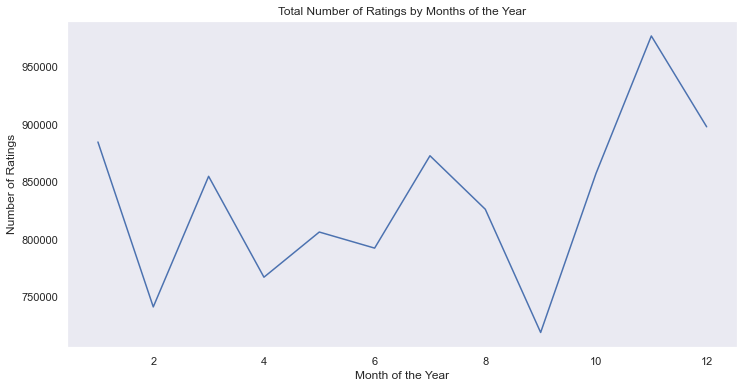

In [33]:
# Group rating by Month
moy = train_df.groupby(['Month'])['rating'].count().reset_index()

# creating a line Plot
fig, (ax) = plt.subplots(ncols=1, figsize=(12,6))
plt.plot(moy['Month'],moy['rating']); plt.xlabel('Month of the Year') 
plt.ylabel('Number of Ratings'); plt.title('Total Number of Ratings by Months of the Year')
plt.show()

It can be said from this plot, that movies were mostly seen during the winter holiday period as well.

In [34]:
gc.collect()

15541

**Best and Worst rated movies.**     
Here, we will create a copy of our `train_df`. We will use this copy to analyse the best and worst rated movies in the train dataset.

In [36]:
# Create a new dataframe from the train_movies dataframe to get the average rating  
copied_train = train_df.copy()

# Drop any duplicated information 
copied_train.drop_duplicates(['title','genres'], inplace = True)

# Get the  avarage rating for each movie in the data 
total_ratings = train_df.groupby(['movieId','genres']).mean()['rating'].reset_index()

# Merge the the copied and the total_ratings to create a new data 
copied_train = copied_train.merge(total_ratings, on = 'movieId')

copied_train.drop(columns=['userId','rating_x','genres_y'],inplace=True) # Delete the duplicated columns

copied_train.rename(columns={'genres_x':'genres','rating_y':'Average Rating'},inplace=True) # Rename the columns

copied_train.head()

,movieId,timestamp,title,genres,release_year,date_time,Year,Month,Day of Week,Average Rating
0,57669,1518349992,In Bruges (2008),comedy crime drama thriller,2008,2018-02-11 12:53:12,2018,2,6,3.889842
1,5,1206238739,Father of the Bride Part II (1995),comedy,1995,2008-03-23 03:18:59,2008,3,6,3.059165
2,5459,1076215539,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...,action comedy sci-fi,2002,2004-02-08 05:45:39,2004,2,6,3.004276
3,32296,1423042565,Miss Congeniality 2: Armed and Fabulous (2005),adventure comedy crime,2005,2015-02-04 10:36:05,2015,2,2,2.535714
4,366,833375837,Wes Craven's New Nightmare (Nightmare on Elm S...,drama horror mystery thriller,1994,1996-05-29 14:17:17,1996,5,2,2.972609


In [37]:
copied_train.shape

(48203, 10)

In [38]:
# Create a dataframe to check how many times a particular movie has been rated
user_rated = pd.DataFrame(train_df['movieId'].value_counts().reset_index()) 

user_rated.rename(columns = {'index':'movieId','movieId':'Rating count'},inplace = True) # Rename the columns 

copied_train = copied_train.merge(user_rated, on ='movieId') # Combine the copied_train dataset with the User_rated data

# Filter the data 
copied_train = copied_train[copied_train['Rating count'] > 20] # Find the movies which have more than 20 ratings

copied_train = copied_train.sort_values('Average Rating',ascending=False) # Sort the values by the rating feature

copied_train.head()

,movieId,timestamp,title,genres,release_year,date_time,Year,Month,Day of Week,Average Rating,Rating count
5148,171011,1509581112,Planet Earth II (2016),documentary,2016,2017-11-02 01:05:12,2017,11,3,4.517084,439
2660,159817,1485116192,Planet Earth (2006),documentary,2006,2017-01-22 21:16:32,2017,1,6,4.473294,674
9966,171495,1562771572,Cosmos,(no genres listed),9999,2019-07-10 16:12:52,2019,7,2,4.456897,116
59,318,1113025001,"Shawshank Redemption, The (1994)",crime drama,1994,2005-04-09 06:36:41,2005,4,5,4.417624,32831
2168,170705,1572718813,Band of Brothers (2001),action drama war,2001,2019-11-02 19:20:13,2019,11,5,4.399130,575


This dataframe was created to select those movies that were rated at least more than 5 times. A movie that is rated 5.0 just once or twice doesnt mean it is the best rated movie.

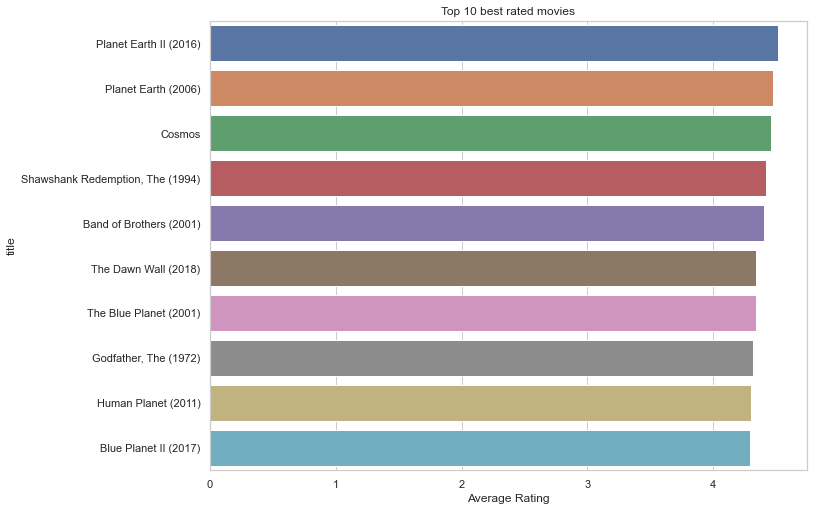

In [42]:
sns.set(style="whitegrid", rc={'figure.figsize':(10.7,8.27)})
sns.barplot(x=copied_train['Average Rating'].head(10), y=copied_train.title.head(10))
sns.color_palette()
plt.title('Top 10 best rated movies');

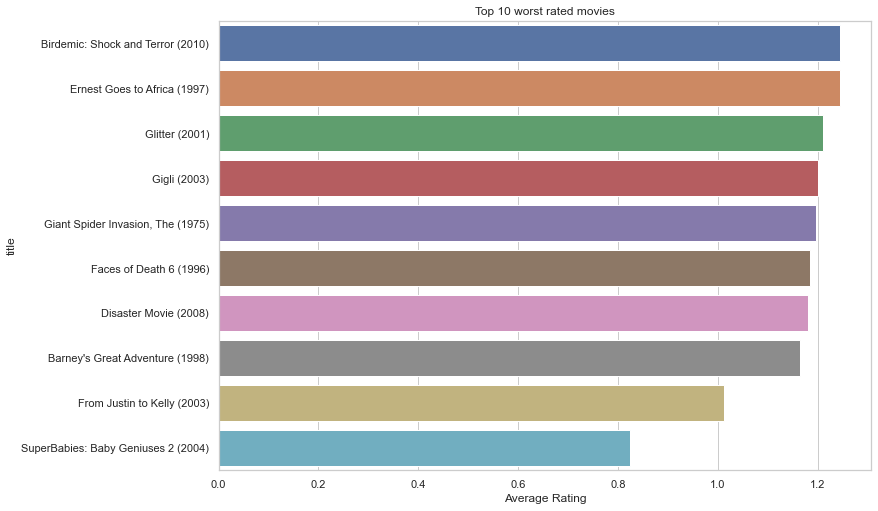

In [47]:
sns.set(style="whitegrid", rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=copied_train['Average Rating'].tail(10), y=copied_train.title.tail(10))
sns.color_palette()
plt.title('Top 10 worst rated movies');

**Rating count by Years**     
If we take a look at our visualizations so far, some of these movies were released in the 19th/20th century. Were these movies rated then? Let us find out by visualizing the rating count by years.

In [81]:
rates_in_years = train_df.groupby(['Year'])['rating'].count().reset_index()
rates_in_years.head()

,Year,rating
0,1995,1
1,1996,571025
2,1997,250545
3,1998,108782
4,1999,424191


In [83]:
fig = px.line(rates_in_years, x = 'Year', y = 'rating',
              title = 'Count of ratings by Year', 
              markers=True)
fig.show()

Alright. the dataframe and visualization above has made it clear. These movies wer being rated starting from the 1990s, with only on movie being rated in 1995. And so far, there are no movies recorded here from 2020 to present.

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In this stage of our predict project, we will;
- Droping some features from our train_df.
- Extracting a sample from our train_df.
- perform text vectorization (Tf-Idf precisely) on our 'genre' feature.

In [ ]:
train_df.head()

Since we are done with our analysis, Let us remove some columns we dont need anymore from the train dataset to save memory.

In [ ]:
# Removing columns in train_df
train_df.drop(columns=['date_time', 'Year', 'Month', 
                       'Day of Week', 'timestamp'], inplace=True)

In [ ]:
train_df.shape

In [ ]:
gc.collect()

**Term Frequency and Inverse Document Frequency (TF-IDF)**     
The `tf-idf` is a technique which is applied to quantify words in a document thereby transforming these words to numbers. It calculates the relevance of words in a corpus. We need this tool to transform the `genre` feature in our dataset for the recommendation system.

Due to the capacity of this local machine, We will take a sample from `movies_df`to build our recommendation system. This is to avoid system freezing or crashing while running codes.

In [ ]:
# Instantiating Tfidf Vectorizer
tfidf_vector = TfidfVectorizer(stop_words='english') 

# applying the object to a sample of genres column in the movies_df
tfidf_matrix = tfidf_vector.fit_transform(movies_df['genres'].head(19000)) 

In [ ]:
tfidf_matrix.shape

In [ ]:
# The list of vectorizated genres
print(list(enumerate(tfidf_vector.get_feature_names())))

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


#### There are 2 types of recommender systems that we will building in this Unsupervised Machine Learning project:     
1.   Content-Based filtering
2.   Collaborative-Based Filtering

### Content-Based Filtering

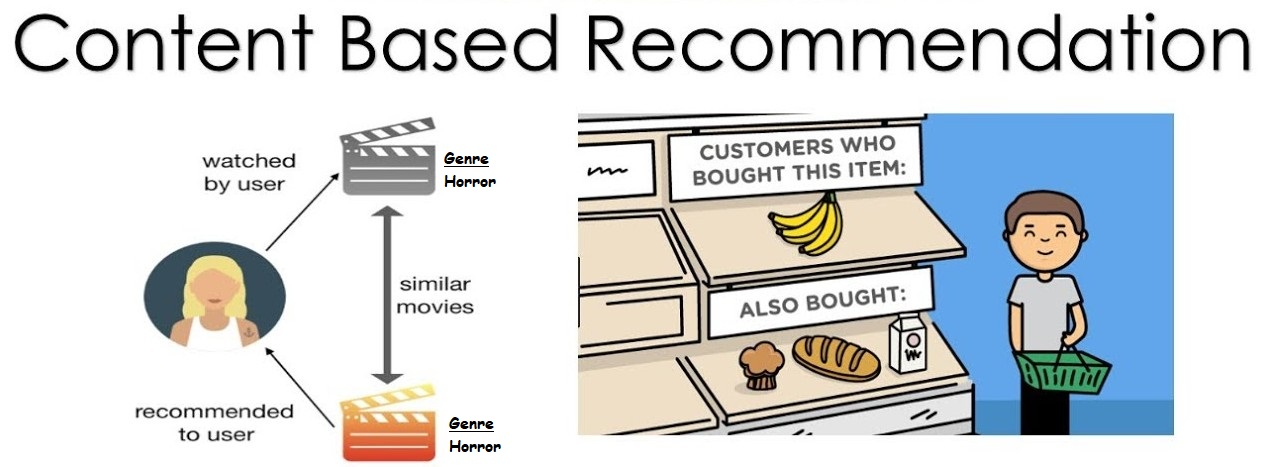

Content-based Filtering is a Machine Learning technique that uses similarities in features to make decisions. We will use this technique for our recommender system.     
In Content-based Filtering, we will create an algorithm that makes recommendations based on how similar the `genres` or `tag` of a movie is to other movies.     
Let us filter based on the movie `genres`.

In [ ]:
# Convienient indexes to map between book titles and indexes of 
# the books dataframe
titles = movies_df['title']
indices = pd.Series(movies_df.index, index=movies_df['title'])

indices.head()

Let us import the `Cosine Similarity` function that will help us detect similar transformed genres.

In [ ]:
# using cosine similarity function on the transformed vectors
sim_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)
print (sim_matrix.shape)

Let us check the similarity between each vector within our matrix. This is done by making use of the `cosine_similarity` function.

In [ ]:
sim_matrix[:5]

Now, we will create an algorithm that will recommend similar movies for a user based on content.

In [ ]:
def content_generate_top_N_recommendations(movie_title, N=10):
    # Convert the string book title to a numeric index for our 
    # similarity matrix
    b_idx = indices[movie_title]
    # Extract all similarity values computed with the reference book title
    sim_scores = list(enumerate(sim_matrix[b_idx]))
    # Sort the values, keeping a copy of the original index of each value
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Select the top-N values for recommendation
    sim_scores = sim_scores[1:N]
    # Collect indexes 
    movie_indices = [i[0] for i in sim_scores]
    # Convert the indexes back into titles 
    return titles.iloc[movie_indices]

In [ ]:
content_generate_top_N_recommendations("Toy Story (1995)", N=10)

In [ ]:
content_generate_top_N_recommendations("Wolf (1994)", N=10)

With our algorithm created, and having seen the recommendation results of *Toy Story (1995)* and *Wolf (1994)*, we see that the recommendation system returns the list of movies similar to these movies based on `genre`. For example, after choosing *Toy story*, our algorithm recommended 10 other `animation genre` movies.     
This can be a good recommender for little kids.

### Collaborative-Based Filtering

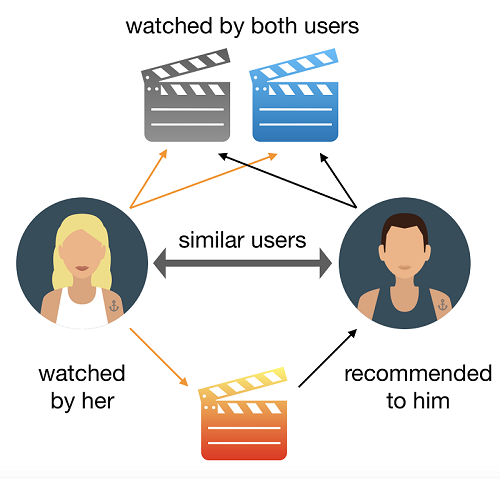

Collaborative filtering methods build a model based on users past behavior (items previously purchased, movies viewed and rated, etc) and use decisions made by current and other users.     
This model is then used to predict items (or ratings for items) that the user may be interested in.

**There are two classes of Collaborative Filtering:**
1.  User-based, which measures the similarity between target users and other users.
2.  Item-based, which measures the similarity between the items that target users rate or interact with and other items.    

We will use this collaborative filtering to predict movie ratings to new users, based on past users ratings or experience.     

Several Unsupervised Learning Algorithms(Models) from `Scikit-Suprise` will be tested here to rate these movies, with the aim of obtaining the lowest `Root Mean Squared Error`.

### Scikit Surprise    
Unlike Supervised Learning, using `Scikit-Suprise`, we will have to load dataset from a pandas dataframe to the model, we will use the `load_from_df()` method, we will also need a Reader object, and the rating_scale parameter must be specified. The dataframe must have three columns, corresponding to the user ids, the item ids, and the ratings in this order. Each row thus corresponds to a given rating.

In [ ]:
#loading our 10million rows dataset
#reader = Reader(rating_scale=(train_df['rating'].min(), train_df['rating'].max()))
#data = Dataset.load_from_df(train_df[['userId', 'movieId', 'rating']], reader)  #Run this code for EC2 Instance

# Turn off this code for EC2 Instance
sample_train_df = train_df.head(1000000)   # taking a sample for loading from train_df
reader = Reader(rating_scale=(sample_train_df['rating'].min(), sample_train_df['rating'].max()))
data = Dataset.load_from_df(sample_train_df[['userId', 'movieId', 'rating']], reader)

#Splitting the loaded dataset
trainset, testset = train_test_split(data, test_size=0.25, random_state=42)

Computing with millions of datasets on this local machine can cause it to freeze or crash. Therefore, we will be taking and working with samples from our datasets in order to avoid funny stories. But we can later try training our models with the whole train_df to see if it all goes well. Training a model with a lot of data realy helps to improve a model.

### Model 1: Normal Predictor       
* NormalPredictor algorithm predicts a random rating based on the distribution of the training set, which is assumed to be normal. This is one of the most basic algorithms that do not do much work.

In [ ]:
NP_Model = NormalPredictor()
NP_Model.fit(trainset)
NP_Model_predictions = NP_Model.test(testset)
NP_Model_rmse=accuracy.rmse(NP_Model_predictions)
NP_Model_mae=accuracy.mae(NP_Model_predictions)

### Model 2: Baseline Only     
* The BaselineOnly algorithm predicts the baseline estimate for given user and movie.

In [ ]:
bsl_options = {'method': 'sgd','n_epochs': 10}
BLO_Model = BaselineOnly(bsl_options=bsl_options,verbose=True)
BLO_Model.fit(trainset)
BLO_Model_predictions = BLO_Model.test(testset)
BLO_Model_rmse=accuracy.rmse(BLO_Model_predictions)
BLO_Model_mae=accuracy.mae(BLO_Model_predictions)

### Model 3: KNN Basic       
* KNNBasic is a basic collaborative filtering algorithm.

In [ ]:
KNNB_Model = KNNBasic()
KNNB_Model.fit(trainset)
KNNB_Model_predictions = KNNB_Model.test(testset)
KNNB_Model_rmse=accuracy.rmse(KNNB_Model_predictions)
KNNB_Model_mae=accuracy.mae(KNNB_Model_predictions)

### Model 4: KNNWithMeans     
* KNNWithMeans is basic collaborative filtering algorithm, taking into account the mean ratings of each user.

In [ ]:
KNNWM_Model = KNNWithMeans()
KNNWM_Model.fit(trainset)
KNNWM_Model_predictions = KNNWM_Model.test(testset)
KNNWM_Model_rmse=accuracy.rmse(KNNWM_Model_predictions)
KNNWM_Model_mae=accuracy.mae(KNNWM_Model_predictions)

### Model 5: KNNWithZScore     

* KNNWithZScore is a basic collaborative filtering algorithm, taking into account the z-score normalization of each user.

In [ ]:
KNNWZs_Model = KNNWithZScore()
KNNWZs_Model.fit(trainset)
KNNWZs_Model_predictions = KNNWZs_Model.test(testset)
KNNWZs_Model_rmse=accuracy.rmse(KNNWZs_Model_predictions)
KNNWZs_Model_mae=accuracy.mae(KNNWZs_Model_predictions)

### Model 6: KNNBaseline     

* KNNBaseline is a basic collaborative filtering algorithm taking into account a baseline rating.

In [ ]:
KNNBl_Model = KNNBaseline()
KNNBl_Model.fit(trainset)
KNNBl_Model_predictions = KNNBl_Model.test(testset)
KNNBl_Model_rmse=accuracy.rmse(KNNBl_Model_predictions)
KNNBl_Model_mae=accuracy.mae(KNNBl_Model_predictions)

### Model 7: SVD
* SVD algorithm is equivalent to Probabilistic Matrix Factorization 

In [ ]:
SVD_Model = SVD(n_epochs=30,n_factors=300, init_std_dev=0.2, verbose=False)
SVD_Model.fit(trainset)

SVD_Model_predictions = SVD_Model.test(testset)
SVD_Model_rmse=accuracy.rmse(SVD_Model_predictions)
SVD_Model_mae=accuracy.mae(SVD_Model_predictions)

#'n_epochs': 30, 'lr_all': 0.005, 'reg_all': 0.06, 'n_factors': 20

### Model 8: SVDpp

* The SVDpp algorithm is an extension of SVD that takes into account implicit ratings.

In [ ]:
SVDpp_Model = SVDpp(n_epochs=10,n_factors=400,init_std_dev=0.001,random_state=42, verbose=True)
SVDpp_Model.fit(trainset)
SVDpp_Model_predictions = SVDpp_Model.test(testset)
SVDpp_Model_rmse=accuracy.rmse(SVDpp_Model_predictions)
SVDpp_Model_mae=accuracy.mae(SVDpp_Model_predictions)

### Model 9: NMF

* NMF is a collaborative filtering algorithm based on Non-negative Matrix Factorization. It is very similar with SVD.

In [ ]:
NMF_Model = NMF(n_epochs=10, n_factors=200, random_state=42,verbose=True)
NMF_Model.fit(trainset)
NMF_Model_predictions = NMF_Model.test(testset)
NMF_Model_rmse=accuracy.rmse(NMF_Model_predictions)
NMF_Model_mae=accuracy.mae(NMF_Model_predictions)

### Model 10: Slope One

* Slope One is a straightforward implementation of the SlopeOne algorithm.

In [ ]:
S1_Model = SlopeOne()
S1_Model.fit(trainset)
S1_Model_predictions = S1_Model.test(testset)
S1_Model_rmse=accuracy.rmse(S1_Model_predictions)
S1_Model_mae=accuracy.mae(S1_Model_predictions)

### Model 11: Co-clustering
* Co-clustering is a collaborative filtering algorithm based on co-clustering.

In [ ]:
CC_Model = CoClustering(n_epochs=10,random_state=42)
CC_Model.fit(trainset)
CC_Model_predictions = CC_Model.test(testset)
CC_Model_rmse=accuracy.rmse(CC_Model_predictions)
CC_Model_mae=accuracy.mae(CC_Model_predictions)

In [ ]:
gc.collect()

<a id="seven"></a>
## 7. Model Evaluation
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

We built and tested 11 different collaborative filtering models and compared their performance using metrics known as:      
-  The `Root Mean Squared Error`(RMSE): which determines the average squared difference between the estimated values and the actual value. 
-  The `Mean Absoluter Error`(MAE):  which measures the average magnitude of the errors in a set of predictions.

A low `RMSE` and `MAE` value indicates high model accuracy.

In [ ]:
RMSE_scores =[NP_Model_rmse, BLO_Model_rmse, KNNB_Model_rmse, KNNWM_Model_rmse, 
              KNNWZs_Model_rmse, KNNBl_Model_rmse, SVD_Model_rmse, SVDpp_Model_rmse, 
              NMF_Model_rmse, S1_Model_rmse, CC_Model_rmse]

MAE_scores =[NP_Model_mae, BLO_Model_mae, KNNB_Model_mae, KNNWM_Model_mae, 
              KNNWZs_Model_mae, KNNBl_Model_mae, SVD_Model_mae, SVDpp_Model_mae, 
              NMF_Model_mae, S1_Model_mae, CC_Model_mae]

models =['Normal Predictor', 'Baseline Only', 'KNNBasic', 'KNNWithMeans',
         'KNNWithZscore', 'KNNBaseline', 'Singular Value Decomposition', 'SVDplus-plus', 
         'Non-Negative Matrix Factorization', 'Slope One', 'Co-Clustering']

model_evals = pd.DataFrame({'Model': models, 'RMSE': RMSE_scores, 'MAE': MAE_scores})

In [ ]:
model_evals.set_index('Model').sort_values('RMSE')

In [ ]:
# smaller grid for testing
param_grid = {
    "n_epochs": [5, 10, 20, 30, 35, 40],
    "lr_all": [0.002, 0.005, 0.01],
    "reg_all": [0.02, 0.04, 0.06],
    'n_factors': [20, 50, 80, 100, 200],
}

gs = GridSearchCV(SVD, param_grid, measures=["rmse", "mae"], refit=True, cv=5, n_jobs=-1)

gs.fit(data)

training_parameters = gs.best_params["rmse"]

print("BEST RMSE: \t", gs.best_score["rmse"])
print("BEST MAE: \t", gs.best_score["mae"])
print("BEST params: \t", gs.best_params["rmse"])

### The best model and why it is the best choice


## Predicting the Sentiments with the test set on Kaggle

### Saving our models to be used for Streamlit

In [ ]:
# SAVING TRAINED MODEL
model_save_path = "SVD_Model.pk"
with open(model_save_path,'wb') as file:
    pickle.dump(SVD_Model_predictions,file)

#### OR

In [ ]:
# SAVING TRAINED MODEL
model_filename = "SVD_Model.pkl"
print (">> Starting dump")
# Dump algorithm and reload it.
file_name = os.path.expanduser(model_filename)
dump.dump(file_name, algo=SVD_Model_predictions)
print (">> Dump done")
print(model_filename)

<a id="eight"></a>
## 8. Conclusion
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Simply put, a recommender system functions by predicting a user's rating or preference for an item. This allows a service provider to build up a catalog of items which it believes the user will want to examine - thereby increasing their engagement with the service and allowing a wider array of content to be considered.

In [ ]:
# Log our parameters and results
experiment.log_parameters(params)
experiment.log_metrics(metrics)

In [ ]:
experiment.end()

## References

- Explore Athena Trains
- Geeksforgeeks
- Datacamp
- Towardsdatascience
- Google
- Stack overflow